In [1]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [30]:
import tensorflow as tf
import os
import pandas as pd

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
import cv2
import imghdr

In [6]:
data_dir = '../pneumonia' 

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 140 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

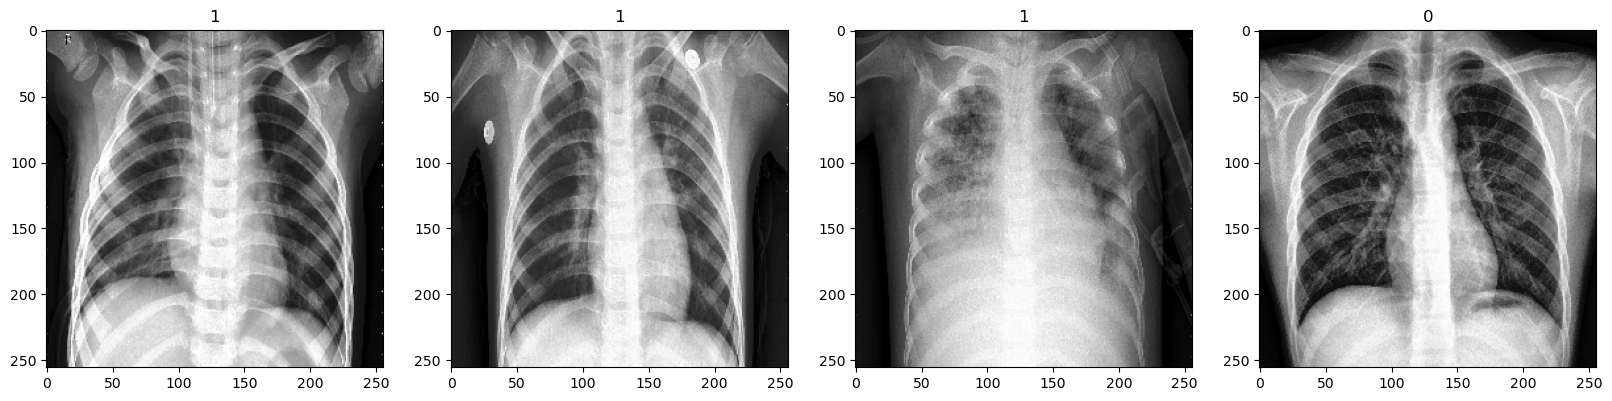

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.0000

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [17]:
train_size

3

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [19]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [27]:
activation_functions = [
    'relu',
    'sigmoid',
    'tanh',
    'softmax',
    'elu',
    'selu',
    'exponential',
    'gelu',
    'hard_sigmoid',
    'swish',
    'linear'
]
def create_model(activation_function):
    model = Sequential()
    model.add(Conv2D(16, (3, 3), 1, activation=activation_function, input_shape=(256, 256, 3)))
    model.add(MaxPooling2D())
    model.add(Conv2D(32, (3, 3), 1, activation=activation_function))
    model.add(MaxPooling2D())
    model.add(Conv2D(16, (3, 3), 1, activation=activation_function))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(256, activation=activation_function))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification output
    model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
    return model

In [32]:
logdir='logs'
results = []

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

Training model with activation: relu


c:\Users\deepr\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_93 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_93 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_94 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_94 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_95 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_95 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_31 (Flatten)            │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 453ms/step - accuracy: 0.5430 - loss: 1.3965 - val_accuracy: 0.4688 - val_loss: 1.0314
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 398ms/step - accuracy: 0.5195 - loss: 0.8505 - val_accuracy: 0.8750 - val_loss: 0.5903
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 376ms/step - accuracy: 0.8958 - loss: 0.5671 - val_accuracy: 0.8125 - val_loss: 0.5297
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 419ms/step - accuracy: 0.8672 - loss: 0.4998 - val_accuracy: 0.8750 - val_loss: 0.4406
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 416ms/step - accuracy: 0.9036 - loss: 0.3693 - val_accuracy: 0.9375 - val_loss: 0.2524
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 390ms/step - accuracy: 0.9206 - loss: 0.2710 - val_accuracy: 0.9688 - val_loss: 0.1601
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 402ms/step - accuracy: 0.8919 - loss: 0.2054 - val_accuracy: 0.9375 - val_loss: 0.1175
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 366ms/step - accuracy: 0.9232 - loss: 0.1723 - val_accuracy: 0.9062 - val_loss:

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_96 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_96 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_97 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_97 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_98 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_98 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_32 (Flatten)            │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 460ms/step - accuracy: 0.5208 - loss: 2.4166 - val_accuracy: 0.3438 - val_loss: 6.2997
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 375ms/step - accuracy: 0.5404 - loss: 4.3745 - val_accuracy: 0.4688 - val_loss: 4.9132
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 402ms/step - accuracy: 0.4935 - loss: 4.6363 - val_accuracy: 0.4062 - val_loss: 5.2680
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 380ms/step - accuracy: 0.4831 - loss: 4.5461 - val_accuracy: 0.6250 - val_loss: 3.1821
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 415ms/step - accuracy: 0.4089 - loss: 4.9762 - val_accuracy: 0.5625 - val_loss: 3.5408
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 390ms/step - accuracy: 0.4727 - loss: 4.2249 - val_accuracy: 0.4062 - val_loss: 4.5750
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 411ms/step - accuracy: 0.5299 - loss: 3.5819 - val_accuracy: 0.5000 - val_loss: 3.6598
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 420ms/step - accuracy: 0.5143 - loss: 3.5175 - val_accuracy: 0.5000 - val_loss:

KeyboardInterrupt: 

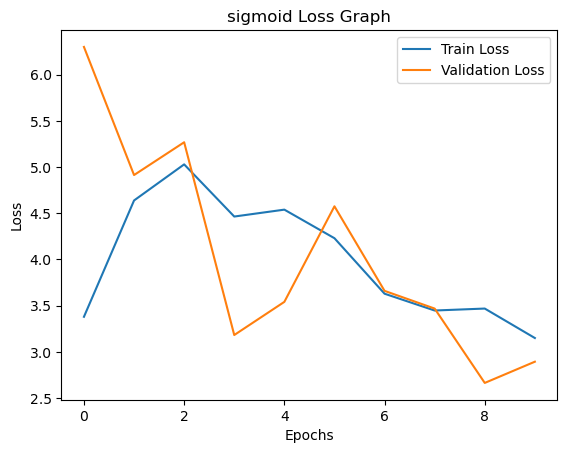

In [34]:
for activation in activation_functions:
    print(f"Training model with activation: {activation}")
    model = create_model(activation)
    model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
    
    # Print model summary (optional)
    model.summary()
    
    # Train the model
    hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])
    train_loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    train_acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    
    # Save results for each activation function
    results.append({
        'activation': activation,
        'train_loss': train_loss[-1],  # Save last epoch's training loss
        'val_loss': val_loss[-1],      # Save last epoch's validation loss
        'train_accuracy': train_acc[-1],  # Save last epoch's training accuracy
        'val_accuracy': val_acc[-1]       # Save last epoch's validation accuracy
    })
    
    # Plot and save the loss graph
    plt.figure()
    plt.plot(train_loss, label='Train Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title(f'{activation} Loss Graph')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'results/{activation}_loss.png')  # Save loss graph
    plt.close()
    
    # Plot and save the accuracy graph
    plt.figure()
    plt.plot(train_acc, label='Train Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title(f'{activation} Accuracy Graph')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(f'results/{activation}_accuracy.png')  # Save accuracy graph
    plt.close()

In [31]:
# fig = plt.figure()
# plt.plot(hist.history['loss'], color='teal', label='loss')
# plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
# fig.suptitle('Loss', fontsize=20)
# plt.legend(loc="upper left")
# plt.show()
df = pd.DataFrame(results)
df.to_excel('activation_function_results.xlsx', index=False)

print("Training results saved to 'activation_function_results.xlsx' and graphs saved to 'graphs/' directory.")

Training results saved to 'activation_function_results.xlsx' and graphs saved to 'graphs/' directory.


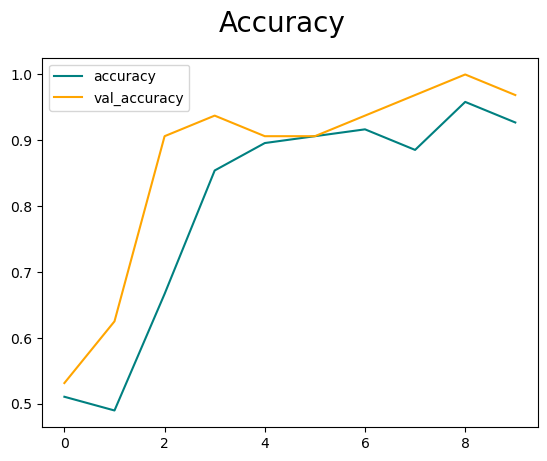

In [37]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [38]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [39]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [40]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [41]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [42]:
import cv2

TypeError: Image data of dtype object cannot be converted to float

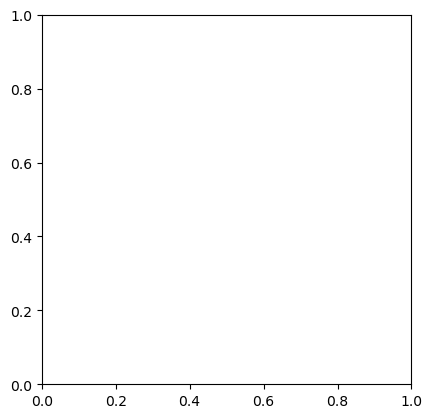

In [57]:
img = cv2.imread('0115.jpeg')
plt.imshow(img)
plt.show()

In [58]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

In [59]:
yhat = model.predict(np.expand_dims(resize/255, 0))


NameError: name 'resize' is not defined

In [60]:
yhat

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [61]:
if yhat > 0.5: 
    print(f'Predicted class is Normal')
else:
    print(f'Predicted class is Covid')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [2]:
from tensorflow.keras.models import load_model

In [63]:
model.save(os.path.join('models','imageclassifier.keras'))

In [3]:
new_model = load_model('models/imageclassifier.keras')

In [65]:
new_model.predict(np.expand_dims(resize/255, 0))

NameError: name 'resize' is not defined

In [7]:
data = tf.keras.utils.image_dataset_from_directory('testp')

Found 40 files belonging to 2 classes.


In [13]:
for batch in data.as_numpy_iterator(): 
    X, y = batch
    yhat = new_model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [16]:
acc.result().numpy()

0.725

In [42]:
from keras.models import load_model
m = load_model("models/imageclassifier.keras")

In [1]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

NameError: name 'hist' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
activation_functions = [
    'relu',
    'sigmoid',
    'tanh',
    'softmax',
    'elu',
    'selu',
    'exponential',
    'gelu',
    'hard_sigmoid',
    'swish',
    'linear'
]